# Дайте мне таблетки от жадности! И побольше, побольше!

![](https://cs4.pikabu.ru/post_img/2016/08/12/8/1471008417115067244.jpg)

In [5]:
import numpy as np
import pandas as pd

from scipy import stats # more style :)
from scipy.optimize import minimize

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

# Задаченька 1. Функция-няша и функция-бяка!

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize

а) Найдите минимум фукнции $f(x_1, x_2) = (x_1 - 2)^2 + (x_2 - 4)^2$

In [6]:
def f(x):
    z = (x[0] - 2) ** 2 + (x[1] - 4) ** 2
    return z

f([7,2])

29

In [7]:
x_init = [0, 0] # инициализация (отсюда мы стартуем)

res = minimize(f, x_init)
res

      fun: 9.095763293783874e-17
 hess_inv: array([[ 0.9, -0.2],
       [-0.2,  0.6]])
      jac: array([ 6.37085673e-09, -2.15944951e-09])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([2.        , 3.99999999])

In [8]:
res.x

array([2.        , 3.99999999])

In [9]:
res.fun

9.095763293783874e-17

Теперь добавим в функцию параметр $a$: $f(x_1, x_2) = (x_1 - 2a)^2 + (x_2 - 4)^2$

б) Найдите экстремум функции при $a=4$ и при $a=10$.

In [11]:
def fa(x, a):
    z = (x[0] - 2 * a) ** 2 + (x[1] - 4) ** 2
    return z

fa([7,2], 4)

5

In [15]:
x_init = [0, 0]

res = minimize(fa, x_init, args=4)
res

      fun: 6.608215109901123e-12
 hess_inv: array([[ 0.5999998 , -0.19999983],
       [-0.19999983,  0.90000022]])
      jac: array([-2.26314395e-06,  4.62395431e-06])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([7.99999886, 4.0000023 ])

In [16]:
x_init = [0, 0]

res = minimize(fa, x_init, args=10)
res

      fun: 2.3881933437907206e-11
 hess_inv: array([[ 0.51923086, -0.09615402],
       [-0.09615402,  0.98076916]])
      jac: array([ 2.14204335e-06, -9.52464809e-06])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([20.00000106,  3.99999523])

Но иногда встречаются функции-бяки :)

$f(x_1, x_2, x_3) = 0.01 (x_1 - 0.5)^2 + |x_1^2 - x_2| + |x_1^2 - x_3|$

в) найдите минимум этой функции устно

г*) найдите минимум этой функции с помощью `minimize` (автор задачи тоже не знает решения)

https://losslandscape.com/

In [18]:
def g(x):
    z = 0.01 * (x[0] - 0.5) ** 2 + np.abs(x[0] ** 2 - x[1]) + np.abs(x[0] ** 2 - x[2]) 
    return z

g([7, 2, 3])

93.4225

In [29]:
x_init = [2, 1, 3]

res = minimize(g, x_init, method="Nelder-Mead", tol=1e-16)
res

 final_simplex: (array([[1.20416781, 1.45002011, 1.44994405],
       [1.2041628 , 1.45000805, 1.44993192],
       [1.20417758, 1.45004365, 1.44996772],
       [1.20420511, 1.45010996, 1.45003441]]), array([0.00503459, 0.00503459, 0.00503459, 0.00503459]))
           fun: 0.005034589991765416
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 601
           nit: 333
        status: 1
       success: False
             x: array([1.20416781, 1.45002011, 1.44994405])

д) нарисуйте функцию fun 

https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

In [33]:
x = np.arange(-10, 10, 0.1)
y = np.arange(-10, 10, 0.1)

x.size

200

In [34]:
x_mesh, y_mesh = np.meshgrid(x, y)
x_mesh.size

40000

In [36]:
z_mesh = f((x_mesh, y_mesh))
z_mesh.shape

(200, 200)

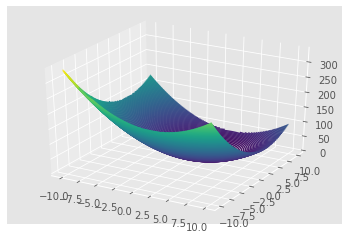

In [44]:
from mpl_toolkits import mplot3d

fig = plt.figure( )
ax = plt.axes(projection="3d")
ax.contour3D(x_mesh, y_mesh, z_mesh, 200)

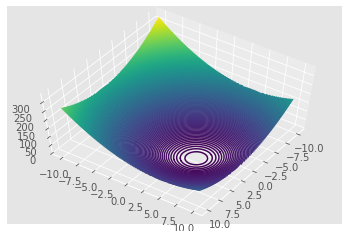

In [45]:
ax.view_init(60, 35)
fig

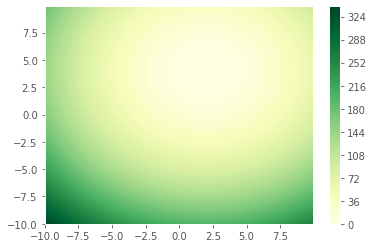

In [57]:
fig, ax = plt.subplots()
cont = ax.contourf(x_mesh, y_mesh, z_mesh, 100, cmap="YlGn")
plt.colorbar(cont);

https://plotly.com/python/3d-surface-plots/

In [59]:
import plotly.graph_objects as go


fig = go.Figure(data=[go.Surface(z=z_mesh, x=x_mesh, y=y_mesh)])

fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))

fig.update_layout(title='Няшная функция', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)

fig.show()

# Задачутка 2. Велика ты, правда, широка стоишь! Ты горами поднялась до поднебесья!

(с) Алексей Толстой

[Как известно](https://www.livelib.ru/quote/305456-malysh-i-karlson-kotoryj-zhivet-na-kryshe-astrid-lindgren), Фрекен Бок пьёт коньяк по утрам.

![](http://semyarf.com/UPLOAD/2016/01/21/frekenbok-216_700_0.jpg)

А у нас даже есть дневные данные (в граммах):

In [60]:
y = [3.2, 7.9, 5.4, 4.9, 6.2, 4.3]

а) Предполагая, что $y_i$ независимы и нормальны $N(\mu, \sigma^2)$ выпишите функцию правдоподобия.



$$
f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \cdot e^{-\frac{(x - \mu)^2}{2 \sigma^2}}
$$

$$
L(\mu, \sigma^2 \mid x_1, \ldots, x_n) =  \frac{1}{(2 \pi \sigma^2)^{\frac{n}{2}}} \cdot e^{- \sum_{i=1}^n \frac{(x_i - \mu)^2}{2 \sigma^2}}
$$

$$
\ln L(\mu, \sigma^2 \mid x_1, \ldots, x_n) \propto  -0.5 \cdot n \cdot \ln  \sigma^2 - \sum_{i=1}^n \frac{(x_i - \mu)^2}{2 \sigma^2} \to \max_{\mu, \sigma^2}
$$

https://detexify.kirelabs.org/classify.html

$\propto$ - равенство с точностью до константы

Чтобы гарантировать положительность параметра $\sigma^2$ функция у нас будет зависеть от вектора параметров $\theta$, причем $\theta_1 = \mu$, а $\theta_2 = \ln \sigma^2$.

In [61]:
def lnL(theta, y):
    mu = theta[0]  
    s2 = np.exp(theta[1]) # хак, чтобы s2 всегда была неотрицательной
    
    y = np.array(y)
    n = y.size
    
    l = -0.5 * n * np.log(s2) - 0.5 / s2 * np.sum((y - mu)**2)
    return -l  # домножили на -1, чтобы минимизировать

lnL([4, 0.2], y)

10.240554617493236

б) Найдите экстремум функции правдоподобия

In [62]:
theta_init = [0, 0]

res = minimize(lnL, theta_init, args=y)
res

      fun: 5.3536066159540265
 hess_inv: array([[0.35276625, 0.01304985],
       [0.01304985, 0.31981703]])
      jac: array([-1.90734863e-06,  2.14576721e-06])
  message: 'Optimization terminated successfully.'
     nfev: 68
      nit: 14
     njev: 17
   status: 0
  success: True
        x: array([5.31666598, 0.78453623])

In [63]:
mu, s2 = res.x
s2 = np.exp(s2)
mu, s2

(5.316665984274554, 2.1913904108990967)

в) Получите тот же результат используя встроенный метод `stats.norm.fit`:

In [65]:
mu, s = stats.norm.fit(y)
s2 = s ** 2
mu, s2

(5.316666666666666, 2.191388888888889)

г) Построить $95\%$ доверительный интервал для $\mu$

In [66]:
# по диагонали - оценки дисперсий Var(mu_hat), Var(lns2_hat)
# Cov(ma_hat, lns2_hat) - второстепеннпя диагональ
res.hess_inv

array([[0.35276625, 0.01304985],
       [0.01304985, 0.31981703]])

In [68]:
np.var(y)/len(y) # примерно совпадают

0.3652314814814815

In [67]:
alpha = 0.05
z = stats.norm().ppf(1 - alpha/2)

res.x[0] - z * np.sqrt(res.hess_inv[0,0]), res.x[0] + z * np.sqrt(res.hess_inv[0,0])

(4.152562463679407, 6.4807695048697)

# Задачулечка 3. 

А ещё Фрекен-Бок иногда видит привидения! Данные по количеству привидений у нас тоже есть :)

In [70]:
fbock = pd.DataFrame({'y': [3.2, 7.9, 5.4, 4.9, 6.2, 4.3], 'ghost': [1, 2, 0, 0, 2, 0]})

Предположим, что количество привидений имеет пуассоновское распределение с параметром $\lambda$. 

а) Оцените $\lambda$ с помощью ММП:

$$
\mathbb{P}(X = k) = \frac{e^{-\lambda} \cdot \lambda^k}{k!}
$$

$$
L(\lambda \mid x_1, \ldots x_n) = \frac{e^{-\lambda} \cdot \lambda^{
x_1}}{x_1!} \cdot \ldots \cdot \frac{e^{-\lambda} \cdot \lambda^{x_n}}{x_n!}
$$

$$
\ln L(\lambda \mid x_1, \ldots x_n) = \cdot n + \ln \lambda \cdot \sum_{i=1}^n x_i - \sum_{i=1}^n x_i!  \propto - \lambda \cdot n + \ln \lambda \cdot \sum_{i=1}^n x_i \to \max_{\lambda}
$$

$$
\ln L(\lambda \mid x_1, \ldots x_n)  \propto  \sum_{i=1}^n [- \lambda + \ln \lambda \cdot x_i] \to \max_{\lambda}
$$

In [73]:
x = fbock['ghost']

def lnL(theta, x):
    rate = np.exp(theta) # тот же самый хак
    x = np.array(x)
    l = -rate + np.log(rate) * x
    return -1*np.sum(l)

In [74]:
lnL(4, x)

307.5889001988654

In [75]:
theta_init = 0
res = minimize(lnL, theta_init, args=x)
res

      fun: 5.91160778397651
 hess_inv: array([[0.2006664]])
      jac: array([8.34465027e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([-0.18231992])

In [76]:
lam = np.exp(res.x)
lam

array([0.8333347])

In [77]:
# проверяем себя!
np.mean(x)

0.8333333333333334

Предположим, что в $i$-й день интенсивность пуассоновского распределения $\lambda_i$ связана с количеством выпитого коньяка формулой $\lambda_i = \exp(a + b y_i)$.

б) Оцените параметры $a$ и $b$, лапками выписав функцию правдоподобия. 



$$
\ln L(\lambda \mid x_1, \ldots x_n)  \propto  \sum_{i=1}^n [- \lambda_i + \ln \lambda_i \cdot x_i] \to \max_{a, b}
$$

$$
\lambda_i = \exp(a + b y_i)
$$

In [82]:
def lnL(theta, fbock):
    x = np.array(fbock['ghost'])
    y = np.array(fbock['y'])
    
    a = theta[0]
    b = theta[1]
    
    rate = np.exp(a + b*y) # тот же самый хак
    l = -rate + np.log(rate) * x
    return -1*np.sum(l)

lnL([1,2], fbock)

20635012.00334143

In [83]:
theta_init = [0, 0]
res = minimize(lnL, theta_init, args=fbock)
res

      fun: 4.901374802427494
 hess_inv: array([[ 3.65178738, -0.54899458],
       [-0.54899458,  0.08731151]])
      jac: array([5.96046448e-08, 5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 52
      nit: 9
     njev: 13
   status: 0
  success: True
        x: array([-2.59878438,  0.4169601 ])

In [84]:
y_test = np.array([1, 2])
lam_hat = np.exp(res.x[0] + res.x[1]*y_test)
lam_hat

array([0.1128355 , 0.17121004])

In [85]:
# вероятность, что ФБ увидит 1 призрака в дни, когда она хряпнула 1 и 2 кружки коньяка
np.exp(lam_hat)*lam_hat

array([0.12631345, 0.2031818 ])

Данная модель является довольно популярной и реализована в `statsmodels`.

в) Сравните ваши результаты с результатами в `statsmodels`:

In [86]:
# !pip install statsmodels
import statsmodels.formula.api as smf

In [87]:
model = smf.poisson(data=fbock, formula="ghost ~ 1 + y")
model.fit().summary()

Optimization terminated successfully.
         Current function value: 1.047945
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                  ghost   No. Observations:                    6
Model:                        Poisson   Df Residuals:                        4
Method:                           MLE   Df Model:                            1
Date:                Tue, 26 May 2020   Pseudo R-squ.:                  0.1384
Time:                        10:27:26   Log-Likelihood:                -6.2877
converged:                       True   LL-Null:                       -7.2979
Covariance Type:            nonrobust   LLR p-value:                    0.1552
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5988      1.918     -1.355      0.175      -6.358       1.161
y              0.4170      0.297      1.404      0.160      -0.165       0.999
==============================================================================
"""

# Задачушка 4

Предположим другую вероятностную модель. Теперь мы будем предполагать, что сам факт обнаружения хотя бы одного приведения, имеет вероятность $p_i$, зависящую от $y_i$:

$p_i = \exp(a + b y_i) / (1 + \exp(a + b y_i))$

а) Введите дамми-переменную равную 1, если Фрекен Бок видела приведение:

б) Определив лапками функцию правдоподобия, оцените $a$ и $b$:

в) Оцените $a$ и $b$ с помощью `statsmodels`. Нужная модель называется `logit`.